In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
x = np.linspace(-1.1, 1.1, 100)
f = np.exp(x) + np.sin(5*x)
#f = x**3 - x**2 + x - 1

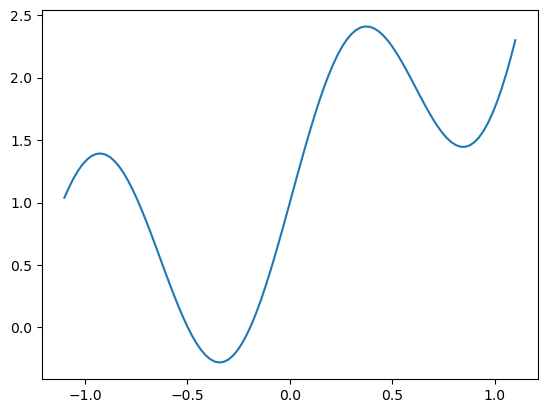

In [4]:
plt.Figure()
plt.plot(x, f)
#plt.xlim([-1.1, 1.1])
#plt.ylim([-0.5, 2.6])
plt.show()

# Planteamiento de entradas y salidas

In [5]:
# Convertir datos a tensores
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
f_tensor = torch.tensor(f, dtype=torch.float32).unsqueeze(1)

# Una neurona

Epoch [100/1000], Loss: 0.6828
Epoch [200/1000], Loss: 0.6828
Epoch [300/1000], Loss: 0.6828
Epoch [400/1000], Loss: 0.6828
Epoch [500/1000], Loss: 0.6828
Epoch [600/1000], Loss: 0.6828
Epoch [700/1000], Loss: 0.6828
Epoch [800/1000], Loss: 0.6828
Epoch [900/1000], Loss: 0.6828
Epoch [1000/1000], Loss: 0.6828


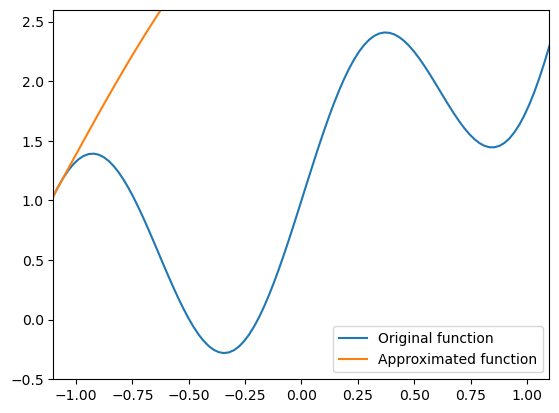

Ecuación explícita: f(x) = -3.2472 * relu(-1.0648 * x + -1.1153) + 1.2220


In [7]:
# Convertir datos a tensores
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
f_tensor = torch.tensor(f, dtype=torch.float32).unsqueeze(1)

# Definir el modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 1)  # Capa con 2 nodos
        self.fc2 = nn.Linear(1, 1)  # Capa de salida

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.LBFGS(model.parameters(), lr=0.01)

# Función de cierre para el optimizador L-BFGS
def closure():
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, f_tensor)
    loss.backward()
    return loss

# Entrenar el modelo
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.step(closure)

    if (epoch+1) % 100 == 0:
        loss = closure().item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

# Extraer los pesos y sesgos del modelo
fc1_weights = model.fc1.weight.data.numpy()
fc1_biases = model.fc1.bias.data.numpy()
fc2_weights = model.fc2.weight.data.numpy()[0]
fc2_bias = model.fc2.bias.data.numpy()[0]

# Definir la ecuación explícita
def approximated_function(x):
    hidden_layer_output = np.arctan(fc1_weights @ x + fc1_biases)
    return fc2_weights @ hidden_layer_output + fc2_bias

# Evaluar la función aproximada
x_vals = np.linspace(-1.1, 1.1, 100)
approximated_vals = np.array([approximated_function(np.array([xi])) for xi in x_vals])

# Graficar los resultados
plt.plot(x, f, label='Original function')
plt.plot(x_vals, approximated_vals, label='Approximated function')
plt.xlim([-1.1, 1.1])
plt.ylim([-0.5, 2.6])
plt.legend()
plt.show()

# Imprimir la ecuación explícita
equation = "f(x) = "
for i in range(1):
    equation += f"{fc2_weights[i]:.4f} * relu({fc1_weights[i, 0]:.4f} * x + {fc1_biases[i]:.4f}) + "
equation += f"{fc2_bias:.4f}"
print("Ecuación explícita:", equation)

# Dos neuronas

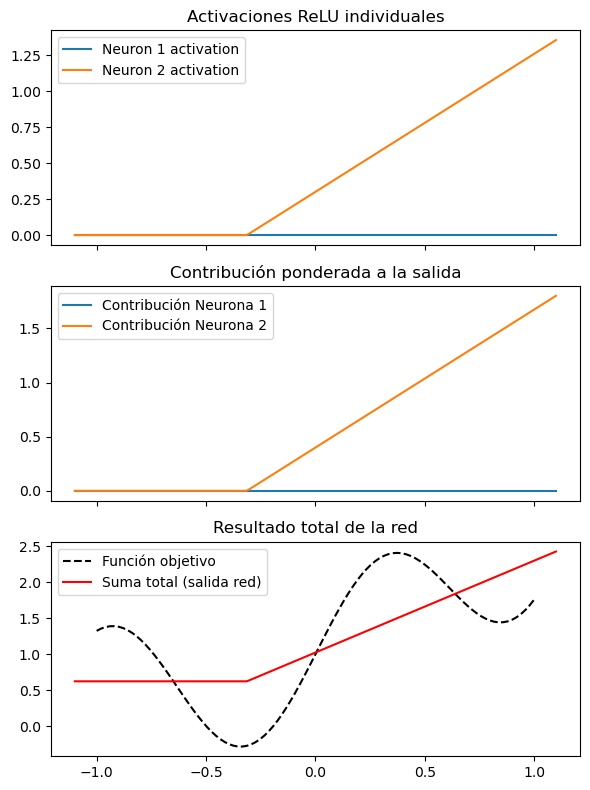

Ecuación explícita:
 f(x) = 0.5817 * relu(0.6169 * x + -1.1824) + 1.3286 * relu(0.9597 * x + 0.3005) + 0.6263


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# ==== Datos ====
x = np.linspace(-1, 1, 100)
f = np.exp(x) + np.sin(5*x)

x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
f_tensor = torch.tensor(f, dtype=torch.float32).unsqueeze(1)

# ==== Definir el modelo ====
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 2)  # 2 neuronas ocultas
        self.fc2 = nn.Linear(2, 1)  # salida

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# ==== Entrenamiento ====
criterion = nn.MSELoss()
optimizer = optim.LBFGS(model.parameters(), lr=0.01)

def closure():
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, f_tensor)
    loss.backward()
    return loss

for epoch in range(200):
    optimizer.step(closure)

# ==== Extraer pesos ====
fc1_weights = model.fc1.weight.data.numpy()
fc1_biases = model.fc1.bias.data.numpy()
fc2_weights = model.fc2.weight.data.numpy()[0]
fc2_bias = model.fc2.bias.data.numpy()[0]

# ==== Funciones individuales ====
def relu(z): return np.maximum(0, z)

def neuron_output(i, x):
    """Salida individual de la neurona i (sin multiplicar por fc2 todavía)."""
    return relu(fc1_weights[i, 0] * x + fc1_biases[i])

def contribution(i, x):
    """Contribución a la salida total."""
    return fc2_weights[i] * neuron_output(i, x)

# ==== Evaluar funciones ====
x_vals = np.linspace(-1.1, 1.1, 200)
neuron1 = neuron_output(0, x_vals)
neuron2 = neuron_output(1, x_vals)
contrib1 = contribution(0, x_vals)
contrib2 = contribution(1, x_vals)
total = contrib1 + contrib2 + fc2_bias

# ==== Graficar ====
fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharex=True)

axes[0].plot(x_vals, neuron1, label='Neuron 1 activation', color='C0')
axes[0].plot(x_vals, neuron2, label='Neuron 2 activation', color='C1')
axes[0].set_title('Activaciones ReLU individuales')
axes[0].legend()

axes[1].plot(x_vals, contrib1, label='Contribución Neurona 1', color='C0')
axes[1].plot(x_vals, contrib2, label='Contribución Neurona 2', color='C1')
axes[1].set_title('Contribución ponderada a la salida')
axes[1].legend()

axes[2].plot(x, f, 'k--', label='Función objetivo')
axes[2].plot(x_vals, total, 'r', label='Suma total (salida red)')
axes[2].set_title('Resultado total de la red')
axes[2].legend()

plt.tight_layout()
plt.show()

# ==== Mostrar ecuación explícita ====
equation = "f(x) = "
for i in range(2):
    equation += f"{fc2_weights[i]:.4f} * relu({fc1_weights[i,0]:.4f} * x + {fc1_biases[i]:.4f}) + "
equation += f"{fc2_bias:.4f}"
print("Ecuación explícita:\n", equation)


# Tres neuronas

Epoch [100/1000], Loss: 0.0420
Epoch [200/1000], Loss: 0.0312
Epoch [300/1000], Loss: 0.0312
Epoch [400/1000], Loss: 0.0312
Epoch [500/1000], Loss: 0.0312
Epoch [600/1000], Loss: 0.0312
Epoch [700/1000], Loss: 0.0312
Epoch [800/1000], Loss: 0.0312
Epoch [900/1000], Loss: 0.0312
Epoch [1000/1000], Loss: 0.0312


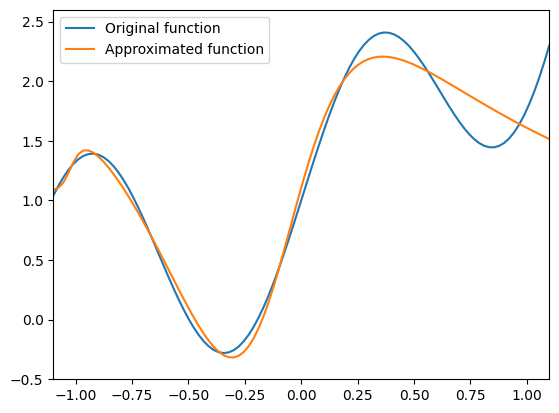

Ecuación explícita: f(x) = -19.1674 * atan(-2.5665 * x + -0.2488) + -0.3680 * atan(-17.8906 * x + -18.3226) + -20.6059 * atan(2.0819 * x + 0.2856) + 1.6079


In [12]:
# Definir el modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 3)  # Capa con 3 nodos
        self.fc2 = nn.Linear(3, 1)  # Capa de salida

    def forward(self, x):
        x = torch.atan(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.LBFGS(model.parameters(), lr=0.01)

# Función de cierre para el optimizador L-BFGS
def closure():
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, f_tensor)
    loss.backward()
    return loss

# Entrenar el modelo
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.step(closure)

    if (epoch+1) % 100 == 0:
        loss = closure().item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

# Extraer los pesos y sesgos del modelo
fc1_weights = model.fc1.weight.data.numpy()
fc1_biases = model.fc1.bias.data.numpy()
fc2_weights = model.fc2.weight.data.numpy()[0]
fc2_bias = model.fc2.bias.data.numpy()[0]

# Definir la ecuación explícita
def approximated_function(x):
    hidden_layer_output = np.arctan(fc1_weights @ x + fc1_biases)
    return fc2_weights @ hidden_layer_output + fc2_bias

# Evaluar la función aproximada
x_vals = np.linspace(-1.1, 1.1, 100)
approximated_vals = np.array([approximated_function(np.array([xi])) for xi in x_vals])

# Graficar los resultados
plt.plot(x, f, label='Original function')
plt.plot(x_vals, approximated_vals, label='Approximated function')
plt.xlim([-1.1, 1.1])
plt.ylim([-0.5, 2.6])
plt.legend()
plt.show()

# Imprimir la ecuación explícita
equation = "f(x) = "
for i in range(3):
    equation += f"{fc2_weights[i]:.4f} * atan({fc1_weights[i, 0]:.4f} * x + {fc1_biases[i]:.4f}) + "
equation += f"{fc2_bias:.4f}"
print("Ecuación explícita:", equation)

# Cuatro neuronas

Epoch [100/1000], Loss: 0.0005
Epoch [200/1000], Loss: 0.0002
Epoch [300/1000], Loss: 0.0002
Epoch [400/1000], Loss: 0.0002
Epoch [500/1000], Loss: 0.0002
Epoch [600/1000], Loss: 0.0002
Epoch [700/1000], Loss: 0.0002
Epoch [800/1000], Loss: 0.0002
Epoch [900/1000], Loss: 0.0002
Epoch [1000/1000], Loss: 0.0002


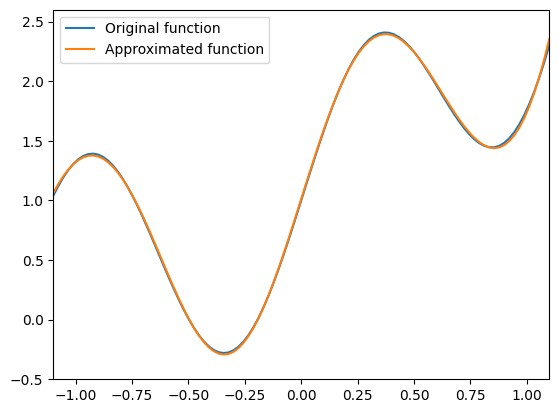

Ecuación explícita: f(x) = 24.0804 * atan(-1.4839 * x + -0.8128) + -93.8521 * atan(0.9048 * x + -0.4774) + -170.3697 * atan(-0.3467 * x + 0.6858) + -55.6373 * atan(-1.0170 * x + 0.0378) + 80.1597


In [13]:
# Definir el modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 4)  # Capa con 3 nodos
        self.fc2 = nn.Linear(4, 1)  # Capa de salida

    def forward(self, x):
        x = torch.atan(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.LBFGS(model.parameters(), lr=0.01)

# Función de cierre para el optimizador L-BFGS
def closure():
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, f_tensor)
    loss.backward()
    return loss

# Entrenar el modelo
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.step(closure)

    if (epoch+1) % 100 == 0:
        loss = closure().item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

# Extraer los pesos y sesgos del modelo
fc1_weights = model.fc1.weight.data.numpy()
fc1_biases = model.fc1.bias.data.numpy()
fc2_weights = model.fc2.weight.data.numpy()[0]
fc2_bias = model.fc2.bias.data.numpy()[0]

# Definir la ecuación explícita
def approximated_function(x):
    hidden_layer_output = np.arctan(fc1_weights @ x + fc1_biases)
    return fc2_weights @ hidden_layer_output + fc2_bias

# Evaluar la función aproximada
x_vals = np.linspace(-1.1, 1.1, 100)
approximated_vals = np.array([approximated_function(np.array([xi])) for xi in x_vals])

# Graficar los resultados
plt.plot(x, f, label='Original function')
plt.plot(x_vals, approximated_vals, label='Approximated function')
plt.xlim([-1.1, 1.1])
plt.ylim([-0.5, 2.6])
plt.legend()
plt.show()

# Imprimir la ecuación explícita
equation = "f(x) = "
for i in range(4):
    equation += f"{fc2_weights[i]:.4f} * atan({fc1_weights[i, 0]:.4f} * x + {fc1_biases[i]:.4f}) + "
equation += f"{fc2_bias:.4f}"
print("Ecuación explícita:", equation)

# Cinco neuronas

Epoch [100/1000], Loss: 0.0000
Epoch [200/1000], Loss: 0.0000
Epoch [300/1000], Loss: 0.0000
Epoch [400/1000], Loss: 0.0000
Epoch [500/1000], Loss: 0.0000
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000


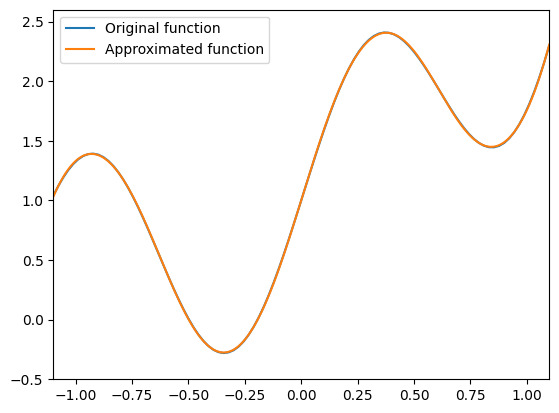

Ecuación explícita: f(x) = 3.6031 * atan(3.2432 * x + -4.1398) + -2.6883 * atan(2.8064 * x + -1.7066) + -3.3040 * atan(2.5876 * x + 1.5902) + 3.7498 * atan(2.4878 * x + 0.0076) + -2.7125 * atan(-3.3972 * x + -4.3498) + 2.6676


In [14]:
# Definir el modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 5)  # Capa con 3 nodos
        self.fc2 = nn.Linear(5, 1)  # Capa de salida

    def forward(self, x):
        x = torch.atan(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.LBFGS(model.parameters(), lr=0.01)

# Función de cierre para el optimizador L-BFGS
def closure():
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, f_tensor)
    loss.backward()
    return loss

# Entrenar el modelo
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.step(closure)

    if (epoch+1) % 100 == 0:
        loss = closure().item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

# Extraer los pesos y sesgos del modelo
fc1_weights = model.fc1.weight.data.numpy()
fc1_biases = model.fc1.bias.data.numpy()
fc2_weights = model.fc2.weight.data.numpy()[0]
fc2_bias = model.fc2.bias.data.numpy()[0]

# Definir la ecuación explícita
def approximated_function(x):
    hidden_layer_output = np.arctan(fc1_weights @ x + fc1_biases)
    return fc2_weights @ hidden_layer_output + fc2_bias

# Evaluar la función aproximada
x_vals = np.linspace(-1.1, 1.1, 200)
approximated_vals = np.array([approximated_function(np.array([xi])) for xi in x_vals])

# Graficar los resultados
plt.plot(x, f, label='Original function')
plt.plot(x_vals, approximated_vals, label='Approximated function')
plt.xlim([-1.1, 1.1])
plt.ylim([-0.5, 2.6])
plt.legend()
plt.show()

# Imprimir la ecuación explícita
equation = "f(x) = "
for i in range(5):
    equation += f"{fc2_weights[i]:.4f} * atan({fc1_weights[i, 0]:.4f} * x + {fc1_biases[i]:.4f}) + "
equation += f"{fc2_bias:.4f}"
print("Ecuación explícita:", equation)

In [28]:
from moviepy import VideoFileClip
from PIL import Image
import os

In [29]:
# Ruta del archivo de video
video_path = "media/videos/single_layer_nn_approximation/480p15/SingleLayerNNApproximation.mp4"
# Carpeta de salida para los frames PNG
output_folder = "output/pngs"
# Nombre del archivo GIF de salida
gif_output_path = "output/single_layer_nn_approximation.gif"


In [30]:
# Crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

# Cargar el video
clip = VideoFileClip(video_path)

# Guardar cada frame como PNG
for i, frame in enumerate(clip.iter_frames()):
    frame_image = Image.fromarray(frame)
    frame_image.save(os.path.join(output_folder, f"frame_{i:04d}.png"))

# Convertir el video a GIF
clip.write_gif(gif_output_path, fps=40)

print("Conversion completed!")

{'video_found': True, 'audio_found': False, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf61.7.100', 'comment': 'Rendered with Manim Community v0.19.0'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [854, 480], 'bitrate': 93, 'fps': 15.0, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 16.0, 'bitrate': 95, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [854, 480], 'video_bitrate': 93, 'video_fps': 15.0, 'video_duration': 16.0, 'video_n_frames': 240}
/home/orincon/miniconda3/envs/my-manim-environment/lib/python3.12/site-packages/imageio_ffmpeg/binaries/ffmpeg-linux-x86_64-v7.0.2 -i media/videos/single_layer_nn_ap

frame_index:  18%|█▊        | 115/640 [00:00<00:00, 1148.32it/s, now=None]

{'video_found': True, 'audio_found': False, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf61.7.100', 'comment': 'Rendered with Manim Community v0.19.0'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [854, 480], 'bitrate': 93, 'fps': 15.0, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 16.0, 'bitrate': 95, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [854, 480], 'video_bitrate': 93, 'video_fps': 15.0, 'video_duration': 16.0, 'video_n_frames': 240}
/home/orincon/miniconda3/envs/my-manim-environment/lib/python3.12/site-packages/imageio_ffmpeg/binaries/ffmpeg-linux-x86_64-v7.0.2 -i media/videos/single_layer_nn_ap

Conversion completed!


In [31]:
import shutil
import os
import imageio

# Delete the folder if it exists
if os.path.exists('single'):
    shutil.rmtree('single')

# Create the folder
os.makedirs('single')

# Read the GIF
gif = imageio.mimread('output/single_layer_nn_approximation.gif')

# Save every 10th frame as a PNG with numbers from 01 to 10
counter = 0
for i in range(0, len(gif), len(gif) // 100):
    filename = f'single/frame_{counter:02d}.png'
    imageio.imwrite(filename, gif[i])
    counter += 1

In [ ]:
# manim -pql single_layer_nn_approximation.py SingleLayerNNApproximation
# manim -pql neural_network_manim.py NeuralNetworkMobject